just enter the num_of_lines and the path to the datasets and run all

In [55]:
num_of_lines=200

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Demo_metabolic=pd.read_excel("C:/Users/97254/Downloads/Demo_metabolic.xlsx", engine='openpyxl')
Demo_patient_week1_23=pd.read_excel("C:/Users/97254/Downloads/Demo_patient_week1_23.12.xlsx", engine='openpyxl')
Demo_Patient_level_feeding_Daily_19 = pd.read_csv("C:/Users/97254/Downloads/Demo_Patient_level_feeding_Daily_19.11.csv",encoding='latin-1')

Demo_metabolic = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines, :3])
dataap1 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, :1])
dataap2 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, 43:45])

#data2['Weight_adm']=data2['Weight_adm']/data2['Height']
#data2= pd.DataFrame(data2.iloc[:10, :2])

Demo_patient_week1_23=pd.concat([dataap1,dataap2],axis=1)

Demo_patient_week1_23.head()

,patient_id,LOS,outcome1
0,0001F70C-AA4C-46CC-8386-9A4D778B26BA,18.0,No
1,002B9175-E697-4308-904F-243B4074C224,9.0,No
2,002E7282-9C02-4D5C-8D3B-DDA2574ABCEF,5.0,No
3,0030B684-28EE-4076-B8D1-B0CEDB9413F3,2.0,No
4,004E2D79-7F96-431B-AA0E-3A6D5B90097D,4.0,No


In [70]:
Demo_Patient_level_feeding_Daily_19 = pd.DataFrame(Demo_Patient_level_feeding_Daily_19.iloc[:num_of_lines, :])
#data.head()

#merg by id
mer=pd.merge(Demo_metabolic,Demo_Patient_level_feeding_Daily_19,left_on='patient_id',right_on='patient_id',how='left')
mer.head()

,patient_id,Weight_adm,Height,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,9A4D778B26BA,120.0,2.00,635.580000,33.858000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1540.800000,82.080000,1878.55,88.891,1526.40,57.6,1526.40000,57.600000
1,243B4074C224,65.0,1.65,983.200008,65.546667,1253.600016,83.573334,1620.000000,108.000000,1021.200036,68.080002,1431.000000,95.400000,1440.00,96.000,1440.00,96.0,1440.00000,96.000000
2,DDA2574ABCEF,101.0,1.75,1209.600024,80.640002,0.000000,0.000000,1359.710689,66.328712,1878.261696,125.217446,643.043760,42.869584,0.00,0.000,0.00,0.0,0.00000,0.000000
3,B0CEDB9413F3,85.0,1.65,1261.400000,47.600000,337.080000,12.720000,36.746660,1.386666,0.000000,0.000000,0.000000,0.000000,0.00,0.000,0.00,0.0,0.00000,0.000000
4,3A6D5B90097D,70.0,1.75,1114.186815,40.269895,1946.950636,96.729665,1896.193822,100.402857,1970.866173,76.641677,432.479894,16.319996,0.00,0.000,1290.02,58.3,134.97333,5.653333


In [71]:
#onley kcal_day and protein_day
mer2 = pd.DataFrame(mer.iloc[:,3 :])

# normelize and concat

for col in mer2.columns:
    mer2[col] = mer2[col]/mer['Weight_adm']
    
mer = mer.iloc[:, :1]
lest=pd.concat([mer,mer2],axis=1)
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762


In [72]:
Demo_patient_week1_23=Demo_patient_week1_23.rename(columns={'patient_id':'patient_id2'},inplace = False)
#dataap.head()

lest=pd.concat([lest,Demo_patient_week1_23],axis=1)
lest.drop('patient_id2',
  axis='columns', inplace=True)
lest.head()

,patient_id,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7,LOS,outcome1
0,9A4D778B26BA,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000,18.0,No
1,243B4074C224,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923,9.0,No
2,DDA2574ABCEF,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,No
3,B0CEDB9413F3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,No
4,3A6D5B90097D,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762,4.0,No


In [73]:
lest=lest.dropna(how='all')
lest2=lest.loc[:, ::2]
lest2['LOS'] = Demo_patient_week1_23['LOS'] 
lest.shape

(200, 19)

# plb=lest.iloc[:, :9]
plb.head()

<AxesSubplot:>

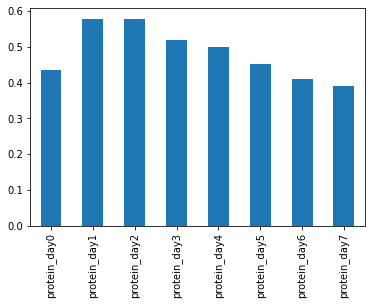

In [44]:
plb.mean().plot(kind='bar')

<AxesSubplot:>

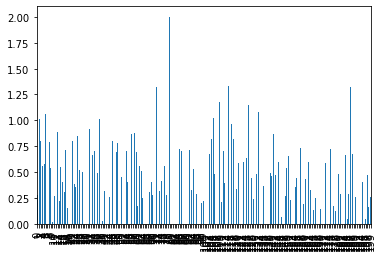

In [45]:
plb['protein_day0'].plot(kind='bar')

<AxesSubplot:>

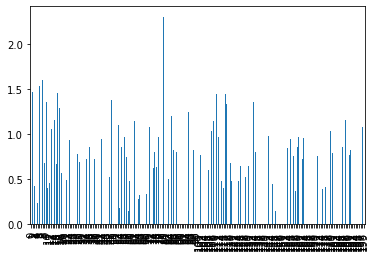

In [46]:
plb['protein_day4'].plot(kind='bar')

In [ ]:
lest=lest.dropna(how='all')

In [92]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
lest0=clean_dataset(lest.iloc[:, 1:17])
lest0.head()

,kcal_day0,protein_day0,kcal_day1,protein_day1,kcal_day2,protein_day2,kcal_day3,protein_day3,kcal_day4,protein_day4,kcal_day5,protein_day5,kcal_day6,protein_day6,kcal_day7,protein_day7
0,5.296500,0.282150,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,12.840000,0.684000,15.654583,0.740758,12.720000,0.480000,12.720000,0.480000
1,15.126154,1.008410,19.286154,1.285744,24.923077,1.661538,15.710770,1.047385,22.015385,1.467692,22.153846,1.476923,22.153846,1.476923,22.153846,1.476923
2,11.976238,0.798416,0.000000,0.000000,13.462482,0.656720,18.596650,1.239777,6.366770,0.424451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,14.840000,0.560000,3.965647,0.149647,0.432314,0.016314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,15.916955,0.575284,27.813581,1.381852,27.088483,1.434327,28.155231,1.094881,6.178284,0.233143,0.000000,0.000000,18.428857,0.832857,1.928190,0.080762


In [94]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lest0.iloc[:, 1:17],lest.iloc[:, 18],test_size=0.2,random_state=4)

In [95]:

knn = KNeighborsClassifier(80)
knn.fit(X_train,y_train)
y_prob = knn.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.8145161290322581 %
Test score before PCA 0.78125 %
